# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('data/fraud_detection_db.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


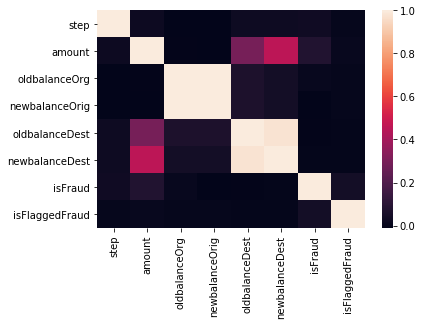

In [7]:
sns.heatmap(data.corr())

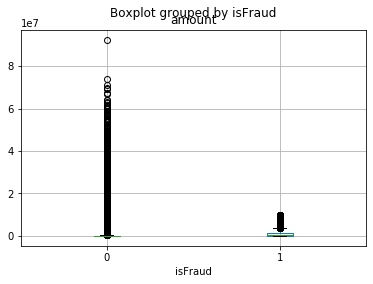

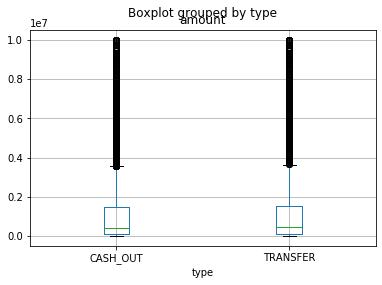

In [8]:
data.boxplot(column='amount', by='isFraud')

data[data.isFraud == 1].boxplot(column='amount', by='type')

#The fraud is done only on cash-out anf transfor operations, and never exceed 1M.

### What is the distribution of the outcome? 

The ratio of fraudulent operations is 0.13 %


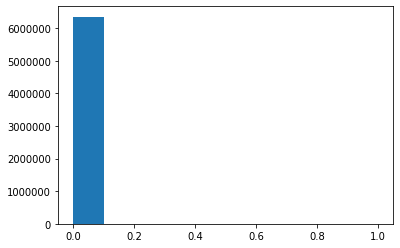

In [9]:
plt.hist(data.isFraud)

print('The ratio of fraudulent operations is', round(len(data[data.isFraud == 1])/len(data.isFraud)*100, 2), '%')

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [10]:
data[data.isFraud == 1].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


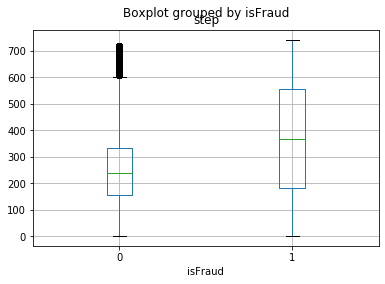

In [11]:
data.boxplot(column='step', by='isFraud')

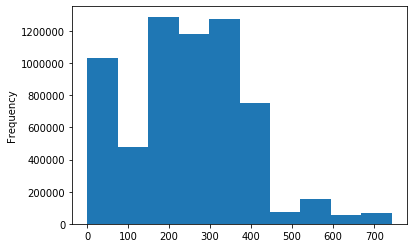

In [12]:
data['step'].plot.hist()

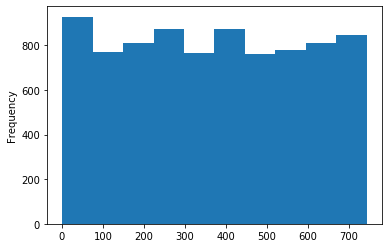

In [13]:
data[data.isFraud == 1]['step'].plot.hist()
#In the event of a fraud, the step doesn't seem to matter. And step is not an accurate measure of time.

In [14]:
data['nameOrig'].replace('[0-9]', '', inplace=True, regex=True)
#data['nameOrig'].unique()
data.drop('nameOrig', axis=1, inplace=True) #nameOrig is always a C, no variation so I'll drop this column

data['nameDest'].replace('[0-9]', '', inplace=True, regex=True)
data['nameDest'].unique()

array(['M', 'C'], dtype=object)

In [15]:
data.drop('step', axis=1, inplace=True)

print(data.oldbalanceOrg.corr(data.newbalanceOrig))
data.drop('oldbalanceOrg', axis=1,  inplace=True) #perfect correlation with new balance

0.9988027631722811


In [16]:
#data.type.unique()
op_type = {'PAYMENT':0,
           'TRANSFER':1,
           'CASH_OUT':2,
           'DEBIT':3,
           'CASH_IN':4}

data['type'].replace('PAYMENT', 0, inplace=True, regex=True)
data['type'].replace('TRANSFER', 1, inplace=True, regex=True)
data['type'].replace('CASH_OUT', 2, inplace=True, regex=True)
data['type'].replace('DEBIT', 3, inplace=True, regex=True)
data['type'].replace('CASH_IN', 4, inplace=True, regex=True)
data['nameDest'].replace('M', 1, inplace=True, regex=True)
data['nameDest'].replace('C', 0, inplace=True, regex=True)

In [17]:
data.head()

,type,amount,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,9839.64,160296.36,1,0.0,0.0,0,0
1,0,1864.28,19384.72,1,0.0,0.0,0,0
2,1,181.00,0.00,0,0.0,0.0,1,0
3,2,181.00,0.00,0,21182.0,0.0,1,0
4,0,11668.14,29885.86,1,0.0,0.0,0,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [22]:
X = data[['type','amount','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True)
reg = LogisticRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[1270891,       9],
       [   1624,       0]], dtype=int64)

In [34]:
reg.score(X_test, y_test)

#Score is good because ratio between fraud and not fraud is not high enough

0.9987167236138572

### Now pick a model of your choice and evaluate its accuracy.

In [39]:
#len(data[data['isFraud'] == 1])

data_sample = pd.concat([data[data['isFraud'] == 1], data[data['isFraud'] == 0].sample(n=8213)])
#data_sample


X_sample = data_sample[['type','amount','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y_sample = data_sample['isFraud']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sample, y_sample, train_size = 0.8, shuffle=True)
reg_sample = LogisticRegression().fit(X_train_s, y_train_s)
y_pred_s = reg_sample.predict(X_test_s)

In [40]:
confusion_matrix(y_test_s, y_pred_s)

array([[ 771,  895],
       [ 160, 1460]], dtype=int64)

In [42]:
reg_sample.score(X_test_s, y_test_s)

0.6789409616555082

### Which model worked better and how do you know?

It is hard to have a better model than the first logistic regression, based on its accuracy, because the ratio of fraud and non-fraud is too little. Undersampling help us get more correct answer on the opposite.